<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%AF%B8%EB%8B%88%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81/%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%A0%84%EC%B2%98%EB%A6%AC(1103).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})



Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# 국내 야구 데이터로 전처리

import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
my_headers = {'user-agent':'Mozilla/5.0 '}
url = 'https://sports.news.naver.com/kbaseball/record/index?category=kbo&year='
data = pd.DataFrame()
for i in range(2018,2024):
    new_url = url + str(i)
    page = requests.get(new_url, headers=my_headers)
    dat = pd.read_html(page.text)[0]
    dat['year'] = i
    data = pd.concat([data,dat])

data

# # 필요없는 컬럼 삭제
data.drop(['경기수', '연속', '최근 10경기'], axis=1, inplace=True)
data
# 컬럼 이름 변경
data.rename(columns={'순위':'rank', '팀':'team', '승':'win', '패':'lose', '무':'draw',
                     '승률':'winnig_rate', '게임차':'game_behind', '출루율':'out_rate', '장타율':'long_rate'},inplace=True)
data.head()

,rank,team,win,lose,draw,winnig_rate,game_behind,out_rate,long_rate,year
0,1,SK,78,65,1,0.545,0.0,0.356,0.473,2018
1,2,두산,93,51,0,0.646,-14.5,0.376,0.486,2018
2,3,한화,77,67,0,0.535,1.5,0.341,0.422,2018
3,4,넥센,75,69,0,0.521,3.5,0.355,0.448,2018
4,5,KIA,70,74,0,0.486,8.5,0.367,0.457,2018


<Axes: xlabel='year'>

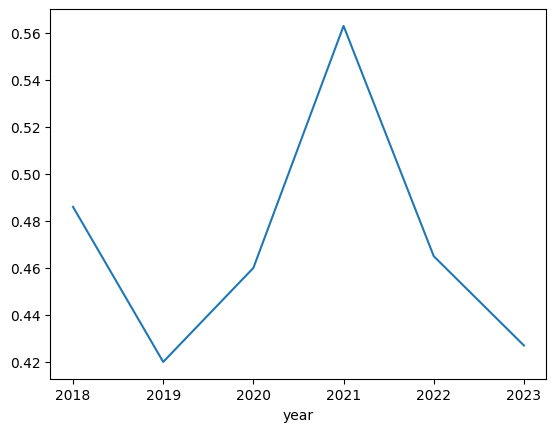

In [ ]:
# 삼성에 관한 데이터 분석
samsung_data = data[data.team=='삼성']
samsung_data

# 인덱스 재설정
samsung_data.set_index('year',inplace=True)
samsung_data

# 최근 6년 동안 삼성의 승률 변화
# samsung_data['winnig_rate'].plot.line()

<Axes: xlabel='team'>

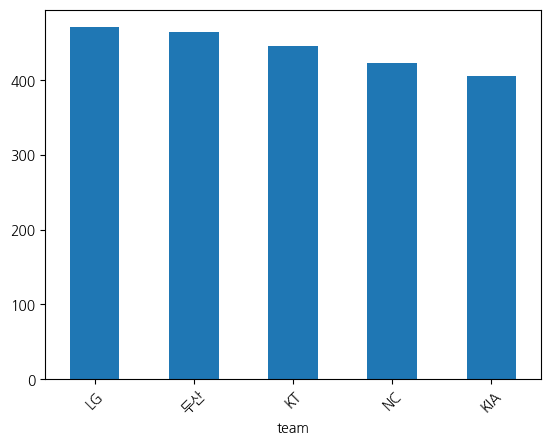

In [ ]:
# 전체 데이터에 대한 분석
# data.set_index('year',inplace=True)
data

# 게임 승 수가 가장 많은 구단 top5
plt.rc('font', family='NanumGothic')
d = data.groupby('team').sum()
d['win'].nlargest(5).plot.bar(rot=45)




Text(0.5, 1.0, '프로 야구 구단의 6년간 순위 변화')

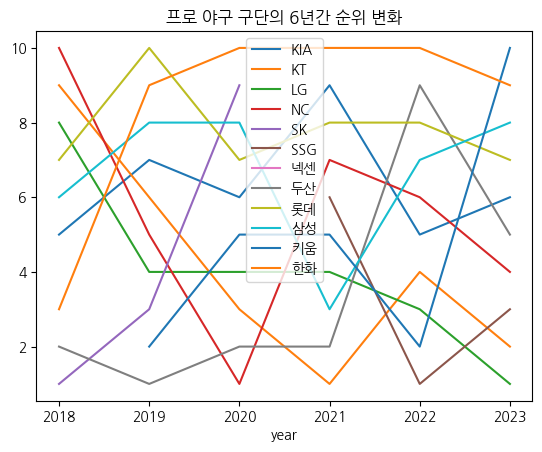

In [ ]:
data.groupby('team')['rank'].plot.line()
plt.legend()
plt.title('프로 야구 구단의 6년간 순위 변화')